# Capstone Project: Churn Analysis


# DATA WRANGLING



# Load data

Firstly I load the csv file into pandas dataframe,print out the first 5 rows to explore the dataset, use df.head() to check the column information of the dataset, it seems that column "TotalCharges" has wrong data type, it should be float instead of object.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import shap
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pickle

In [3]:
# load the csv file into dataframe
df=pd.read_csv('C:\A\Education\Data Science\Capstone project 1\Dataset 3\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# check the first few lines of the dataset
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
#check the information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Check missing values and outliers 

Value count for each column to check whether there is any missing value in each column. For column "TotalCharges", there are missing values and the data type is wrong. Hence I change the data type from string to float and fill the missing value with median (it is more representative to use median because the data are right skew instead of bell shape). Other columns are fine.

In [6]:
#value count the column of "customerID", there is no missing vaule
df['customerID'].value_counts(dropna=False)

7665-VIGUD    1
6158-DWPZT    1
7159-FVYPK    1
0343-QLUZP    1
3307-TLCUD    1
4765-OXPPD    1
5356-CSVSQ    1
0689-NKYLF    1
8454-AATJP    1
6615-NGGZJ    1
5569-KGJHX    1
9250-WYPLL    1
7328-OWMOM    1
6890-PFRQX    1
1194-BHJYC    1
3055-VTCGS    1
3932-CMDTD    1
5193-QLVZB    1
4822-LPTYJ    1
0533-UCAAU    1
5327-XOKKY    1
6818-DJXAA    1
2439-QKJUL    1
7924-GJZFI    1
1090-ESELR    1
6217-KDYWC    1
8434-PNQZX    1
3217-FZDMN    1
4785-QRJHC    1
9643-AVVWI    1
             ..
1952-DVVSW    1
2209-XADXF    1
4195-PNGZS    1
8020-BWHYL    1
3648-GZPHF    1
7426-GSWPO    1
8242-SOQUO    1
9844-FELAJ    1
3275-RHRNE    1
3134-DSHVC    1
0320-JDNQG    1
7839-QRKXN    1
8849-PRIQJ    1
9227-YBAXE    1
1399-UBQIU    1
3221-CJMSG    1
2320-JRSDE    1
5553-AOINX    1
1910-FMXJM    1
6923-AQONU    1
2386-LAHRK    1
2055-BFOCC    1
2309-OSFEU    1
6427-FEFIG    1
1985-MBRYP    1
8433-WPJTV    1
9840-DVNDC    1
5183-KLYEM    1
4026-SKKHW    1
2984-AFWNC    1
Name: customerID, Length

In [7]:
# value count the column of 'gender', no missing value.
df['gender'].value_counts(dropna=False)

Male      3555
Female    3488
Name: gender, dtype: int64

In [8]:
# value check the column of 'SeniorCitizen', no missing value
df['SeniorCitizen'].value_counts(dropna=False)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [9]:
#value check the column of 'Partner', no missing value
df['Partner'].value_counts(dropna=False)

No     3641
Yes    3402
Name: Partner, dtype: int64

In [10]:
#value check the column of 'Dependents', no missing value
df['Dependents'].value_counts(dropna=False)

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [11]:
#check the statistics of 'tenure', no outlier
df['tenure'].value_counts(dropna=False)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
     ... 
20     71
62     70
41     70
53     70
32     69
54     68
47     68
50     68
51     68
58     67
49     66
43     65
42     65
31     65
34     65
37     65
57     65
55     64
40     64
48     64
33     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [12]:
# value count the clolumn of'PhoneService', no missing value
df['PhoneService'].value_counts(dropna=False)

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [13]:
# value count the column of 'MultipleLines', no missing value
df['MultipleLines'].value_counts(dropna=False)

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [14]:
# value count the column of 'InternetService', no missing value
df['InternetService'].value_counts(dropna=False)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [15]:
# value count the column of 'OnlineSecurity', no missing value
df['OnlineSecurity'].value_counts(dropna=False)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [16]:
# value count the column of 'OnlineBackup', no missing value
df['OnlineBackup'].value_counts(dropna=False)

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [17]:
# value count the column of 'DeviceProtection', no missing value
df['DeviceProtection'].value_counts(dropna=False)

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [18]:
# value count the column of 'TechSupport', no missing value
df['TechSupport'].value_counts(dropna=False)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [19]:
# value count the column of 'StreamingTV', no missing value
df['StreamingTV'].value_counts(dropna=False)

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [20]:
# value count the column of 'StreamingMovies', no missing value
df['StreamingMovies'].value_counts(dropna=False)

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [21]:
# value count the column of 'Contract', no missing value
df['Contract'].value_counts(dropna=False)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [22]:
# value count the column of 'PaperlessBilling', no missing value
df['PaperlessBilling'].value_counts(dropna=False)

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [23]:
# value count the column of 'PaymentMethod', no missing value
df['PaymentMethod'].value_counts(dropna=False)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [24]:
# value count the column of 'PaymentMethod', no missing value
df['MonthlyCharges'].value_counts(dropna=False)

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
19.70     43
19.65     43
19.55     40
20.15     40
19.75     39
20.25     39
20.35     38
19.80     38
19.60     37
20.10     37
20.20     35
19.50     32
19.40     31
20.45     31
20.40     30
19.45     28
20.50     28
20.30     28
20.55     27
19.35     25
19.30     24
20.65     23
25.25     20
25.10     19
19.25     18
          ..
67.50      1
33.50      1
48.15      1
31.10      1
39.95      1
81.65      1
117.45     1
107.00     1
66.35      1
62.30      1
112.60     1
110.70     1
28.60      1
108.60     1
73.10      1
39.55      1
53.70      1
21.30      1
18.40      1
67.60      1
33.75      1
29.40      1
57.80      1
34.55      1
107.65     1
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [26]:
#value count the column of 'TotalCharges', there are 11 missing values and the data type has to be changed from 'string' to float
df['TotalCharges'].value_counts(dropna=False)

20.2       11
           11
19.75       9
19.9        8
19.65       8
20.05       8
45.3        7
19.55       7
20.25       6
19.45       6
20.15       6
20.45       5
20.3        5
69.95       4
19.5        4
69.6        4
19.95       4
74.7        4
20.5        4
20.4        4
19.3        4
44.4        4
75.3        4
19.85       4
20.35       4
44          4
19.4        4
70.6        4
19.2        4
69.65       4
           ..
278.85      1
937.6       1
617.35      1
36.55       1
76          1
3635.15     1
2088.8      1
492.55      1
1802.55     1
657.5       1
1268.85     1
679.8       1
930.9       1
851.75      1
231.45      1
1375.15     1
1082.75     1
1952.8      1
3251.3      1
4847.35     1
613.4       1
1117.55     1
6017.65     1
4009.2      1
7030.65     1
1023.9      1
7839.85     1
3001.2      1
2852.4      1
6375.2      1
Name: TotalCharges, Length: 6531, dtype: int64

In [27]:
# change TotalCharges data type from string to float
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [28]:
# confirm that the data type has been changed
df['TotalCharges'].value_counts(dropna=False)

NaN        11
20.20      11
19.75       9
19.90       8
19.65       8
20.05       8
19.55       7
45.30       7
19.45       6
20.15       6
20.25       6
20.30       5
20.45       5
20.35       4
50.15       4
69.90       4
69.95       4
19.30       4
19.95       4
70.60       4
74.70       4
69.60       4
44.00       4
19.50       4
44.40       4
19.20       4
69.65       4
20.40       4
49.90       4
75.30       4
           ..
1971.15     1
1793.25     1
1212.85     1
1504.05     1
1319.95     1
572.20      1
5958.85     1
1673.80     1
958.15      1
7610.10     1
92.05       1
2666.75     1
1001.50     1
7262.00     1
4740.00     1
96.45       1
4483.95     1
5574.75     1
44.65       1
2688.45     1
1374.35     1
3107.30     1
248.95      1
607.30      1
1534.05     1
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6531, dtype: int64

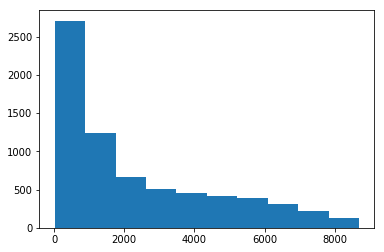

In [75]:
# plot histogram for the column of TotalCharges, it's right skew.
_=plt.hist(df['TotalCharges'])

In [29]:
# fill up missing values with the mediam of the column
Totalcharge_median=df['TotalCharges'].median()
df['TotalCharges']=df.TotalCharges.fillna(Totalcharge_median)

In [30]:
df['TotalCharges'].value_counts(dropna=False)

1397.475    11
20.200      11
19.750       9
19.650       8
20.050       8
19.900       8
19.550       7
45.300       7
19.450       6
20.150       6
20.250       6
20.450       5
20.300       5
19.950       4
19.850       4
19.500       4
20.400       4
20.350       4
20.500       4
44.400       4
69.650       4
19.200       4
69.950       4
70.600       4
69.900       4
69.600       4
44.000       4
50.150       4
49.900       4
19.400       4
            ..
914.300      1
7382.250     1
1971.150     1
1793.250     1
1212.850     1
1673.800     1
2688.450     1
7171.700     1
4483.950     1
4166.350     1
1968.100     1
7610.100     1
92.050       1
2666.750     1
1001.500     1
7262.000     1
4740.000     1
96.450       1
5574.750     1
8333.950     1
958.150      1
44.650       1
1374.350     1
3107.300     1
248.950      1
607.300      1
1534.050     1
1066.150     1
249.950      1
1024.000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [32]:
# value count the column of 'Churn', no missing value
df['Churn'].value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

# Convert categorical data to numeric data

To perform analysis, I need to convert categorical features into numeric. Use LabelEncoder to convert the features that have two values. Use pd.get_dummies to convert the features that have more than two values, consequently one column will become mutiple columns, drop the original column and one of the new columns for analysis purpose and rename the columns. 

In [33]:
#label the column of 'gender' as 0 (female) and 1 (male)
df['gender']=LabelEncoder().fit_transform(df['gender'])

In [34]:
#label the column of 'Partner' as 1 (yes) and 0 (no)
df['Partner']=LabelEncoder().fit_transform(df['Partner'])

In [35]:
#label the column of 'PaperlessBilling' as 1 (yes) and 0 (no)
df['PaperlessBilling']=LabelEncoder().fit_transform(df['PaperlessBilling'])

In [36]:
#label the column of 'Dependents' as 1 (yes) and 0 (no)
df['Dependents']=LabelEncoder().fit_transform(df['Dependents'])

In [37]:
#label the column of 'PhoneService' as 1 (yes) and 0 (no)
df['PhoneService']=LabelEncoder().fit_transform(df['PhoneService'])

In [38]:
#label the column of 'Churn' as 1 (yes) and 0 (no)
df['Churn']=LabelEncoder().fit_transform(df['Churn'])

In [39]:
# create dummy valuables for the column of gender, rename the columns and drop and first and original cplomns
multiplelines_dummies = pd.get_dummies(df['MultipleLines'],drop_first=True).rename(columns=lambda x: 'MultipleLines_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, multiplelines_dummies], axis=1)
# drop the orginal gender column
df=df.drop(columns='MultipleLines')

In [40]:
# create dummy valuables for the column of InternetService, rename the columns and drop the first and original column
InternetService_dummies = pd.get_dummies(df['InternetService'],drop_first=True).rename(columns=lambda x: 'InternetService_' + str(x))
df = pd.concat([df, InternetService_dummies], axis=1)
df=df.drop(columns='InternetService')

In [41]:
# create dummy valuables for the column of OnlineSecurity, rename the columns and drop the first and original column
OnlineSecurity_dummies = pd.get_dummies(df['OnlineSecurity'],drop_first=True).rename(columns=lambda x: 'OnlineSecurity_' + str(x))
df = pd.concat([df, OnlineSecurity_dummies], axis=1)
df=df.drop(columns='OnlineSecurity')

In [42]:
# create dummy valuables for the column of OnlineBackup, rename the columns and drop the first original column
OnlineBackup_dummies = pd.get_dummies(df['OnlineBackup'],drop_first=True).rename(columns=lambda x: 'OnlineBackup_' + str(x))
df = pd.concat([df, OnlineBackup_dummies], axis=1)
df=df.drop(columns='OnlineBackup')

In [43]:
# create dummy valuables for the column of DeviceProtection, rename the columns and drop the first and original column
DeviceProtection_dummies = pd.get_dummies(df['DeviceProtection'],drop_first=True).rename(columns=lambda x: 'DeviceProtection_' + str(x))
df = pd.concat([df, DeviceProtection_dummies], axis=1)
df=df.drop(columns='DeviceProtection')

In [44]:
# create dummy valuables for the column of TechSupport, rename the columns and drop the first and original column
TechSupport_dummies = pd.get_dummies(df['TechSupport'],drop_first=True).rename(columns=lambda x: 'TechSupport_' + str(x))
df = pd.concat([df, TechSupport_dummies], axis=1)
df=df.drop(columns=['TechSupport'], axis=1)

In [45]:
# create dummy valuables for the column of StreamingTV, rename the columns and drop the first and original column
StreamingTV_dummies = pd.get_dummies(df['StreamingTV'],drop_first=True).rename(columns=lambda x: 'StreamingTV_' + str(x))
df = pd.concat([df, StreamingTV_dummies], axis=1)
df=df.drop(columns=['StreamingTV'], axis=1)

In [46]:
# create dummy valuables for the column of StreamingMovies, rename the columns and drop the first original column
StreamingMovies_dummies = pd.get_dummies(df['StreamingMovies'],drop_first=True).rename(columns=lambda x: 'StreamingMovies_' + str(x))
df = pd.concat([df, StreamingMovies_dummies], axis=1)
df=df.drop(columns=['StreamingMovies'], axis=1)

In [47]:
# create dummy valuables for the column of Contract, rename the columns and drop the first and original column
Contract_dummies = pd.get_dummies(df['Contract'],drop_first=True).rename(columns=lambda x: 'Contract_' + str(x))
df = pd.concat([df, Contract_dummies], axis=1)
df=df.drop(columns=['Contract'], axis=1)

In [48]:
# create dummy valuables for the column of PaymentMethod, rename the columns and drop the first and original column
PaymentMethod_dummies = pd.get_dummies(df['PaymentMethod'],drop_first=True).rename(columns=lambda x: 'PaymentMethod_' + str(x))
df = pd.concat([df, PaymentMethod_dummies], axis=1)
df=df.drop(columns=['PaymentMethod',], axis=1)

# Re-confirm the data and pickle it

Re-check the information of the dataframe, pickle the dataframe for next stage analysis.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
gender                                   7043 non-null int32
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int32
Dependents                               7043 non-null int32
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int32
PaperlessBilling                         7043 non-null int32
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
Churn                                    7043 non-null int32
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                

In [77]:
# pickle the dataframe for data exploring
outfile = open('C:\A\Education\Data Science\Capstone project 1\data_wrangling','wb')
pickle.dump(df,outfile)
outfile.close()